<a href="https://colab.research.google.com/github/SuryARavichan/Chatbot/blob/main/S14_SARIMA_model_Airline_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import random
random.seed(1)

In [ ]:
A=pd.read_csv('/content/drive/My Drive/Time Series/airline-passengers.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)
A.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

<Axes: xlabel='Month'>

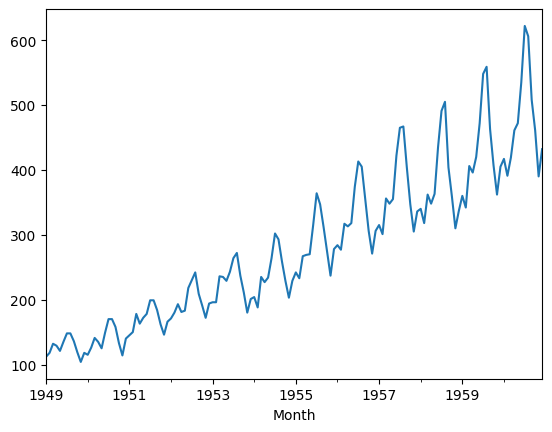

In [ ]:
A.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

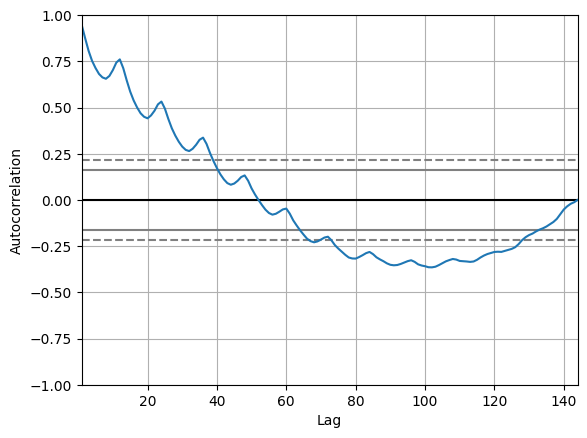

In [ ]:
pd.plotting.autocorrelation_plot(A)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

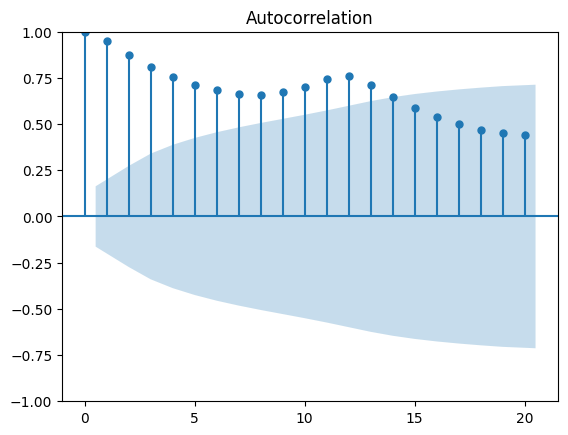

In [ ]:
plot_acf(A,lags=20)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = np.sqrt(mean_squared_error(test, predictions))
	return rmse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# evaluate parameters
p_values = np.arange(10,15)
d_values = range(1, 3)
q_values = range(1, 3)
warnings.filterwarnings("ignore")
evaluate_models(A.values, p_values, d_values, q_values)

ARIMA(10, 1, 1) RMSE=30.205
ARIMA(10, 1, 2) RMSE=21.618
ARIMA(10, 2, 1) RMSE=22.958
ARIMA(10, 2, 2) RMSE=20.009
ARIMA(11, 1, 1) RMSE=25.083
ARIMA(11, 1, 2) RMSE=20.974
ARIMA(11, 2, 1) RMSE=15.740
ARIMA(11, 2, 2) RMSE=15.860
ARIMA(12, 1, 1) RMSE=15.559
ARIMA(12, 1, 2) RMSE=15.764
ARIMA(12, 2, 1) RMSE=15.465
ARIMA(12, 2, 2) RMSE=15.817
ARIMA(13, 1, 1) RMSE=15.438
ARIMA(13, 1, 2) RMSE=15.491
ARIMA(13, 2, 1) RMSE=15.236
ARIMA(13, 2, 2) RMSE=16.178
ARIMA(14, 1, 1) RMSE=15.381
ARIMA(14, 1, 2) RMSE=15.686
ARIMA(14, 2, 1) RMSE=15.464
ARIMA(14, 2, 2) RMSE=15.744
Best ARIMA(13, 2, 1) RMSE=15.236


In [ ]:
#fit-model
best_model=ARIMA(A,order=(9,1,1))
best_model_fit=best_model.fit()

In [ ]:
# split into train and test sets
X = A.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
train

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271])

In [ ]:
history = [x for x in train]

predicted=275.705537, expected=306.000000
predicted=342.312578, expected=315.000000
predicted=321.150523, expected=301.000000
predicted=302.525052, expected=356.000000
predicted=362.609226, expected=348.000000
predicted=328.159841, expected=355.000000
predicted=365.805274, expected=422.000000
predicted=415.417717, expected=465.000000
predicted=468.303411, expected=467.000000
predicted=460.548387, expected=404.000000
predicted=364.846093, expected=347.000000
predicted=337.061707, expected=305.000000
predicted=304.642748, expected=336.000000
predicted=378.807394, expected=340.000000
predicted=347.039298, expected=318.000000
predicted=319.545208, expected=362.000000
predicted=370.183743, expected=348.000000
predicted=330.974681, expected=363.000000
predicted=380.116928, expected=435.000000
predicted=433.599677, expected=491.000000
predicted=500.902643, expected=505.000000
predicted=495.672712, expected=404.000000
predicted=343.735374, expected=359.000000
predicted=361.834794, expected=310

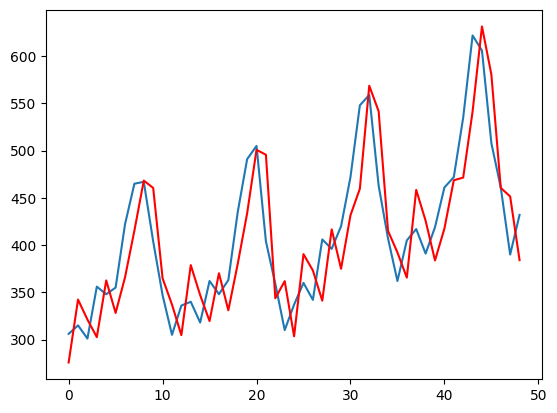

In [ ]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

<Axes: ylabel='Density'>

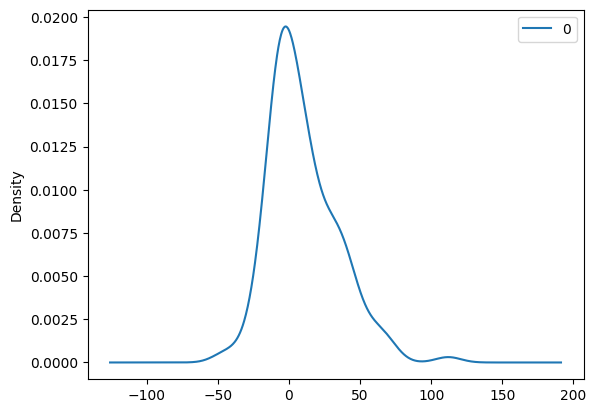

In [ ]:
#Density plot of residuals
residuals=pd.DataFrame(best_model_fit.resid)
residuals.plot(kind='kde')


In [ ]:
residuals.skew()

0    0.963066
dtype: float64

Seasonal Elements
There are four seasonal elements that are not part of ARIMA that must be configured; they are:

#P: Seasonal autoregressive order.
#D: Seasonal difference order.
#Q: Seasonal moving average order.
#m: The number of time steps for a single seasonal period.

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, data):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        data - samples
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(data, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(1, 10, 1)
d = [1]
q = range(0, 3, 1)
P = range(1, 10, 1)
D = [1]
Q = range(0, 3, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

243


In [ ]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 12, A)
result_df['AIC']

  0%|          | 0/243 [00:00<?, ?it/s]

0      1011.759238
1      1012.085005
2      1012.625197
3      1012.636594
4      1013.102310
          ...     
238    1028.502539
239    1028.510960
240    1028.620002
241    1029.517679
242    1030.520478
Name: AIC, Length: 243, dtype: float64

In [ ]:
best_model = SARIMAX(A, order=(9, 1, 1), seasonal_order=(1, 1, 0, 12)).fit(dis=-1)

In [ ]:
best_model.aic

1022.8749577903438

In [ ]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = SARIMAX(history, order=(9, 1, 1), seasonal_order=(1, 1, 0, 12))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))


predicted=319.234858, expected=306.000000
predicted=322.303702, expected=315.000000
predicted=315.422434, expected=301.000000
predicted=335.339778, expected=356.000000
predicted=346.735219, expected=348.000000
predicted=355.331348, expected=355.000000
predicted=412.867654, expected=422.000000
predicted=462.403381, expected=465.000000
predicted=455.034255, expected=467.000000
predicted=404.474673, expected=404.000000
predicted=346.749216, expected=347.000000
predicted=303.382370, expected=305.000000
predicted=350.247122, expected=336.000000
predicted=347.350842, expected=340.000000
predicted=324.987669, expected=318.000000
predicted=387.369919, expected=362.000000
predicted=356.435074, expected=348.000000
predicted=359.570594, expected=363.000000
predicted=441.532139, expected=435.000000
predicted=476.926018, expected=491.000000
predicted=492.970367, expected=505.000000
predicted=427.487516, expected=404.000000
predicted=343.920259, expected=359.000000
predicted=304.147557, expected=310

In [ ]:
type(predictions)

list

In [ ]:
len(predictions),len(test)

(49, 49)

15.835463242296886


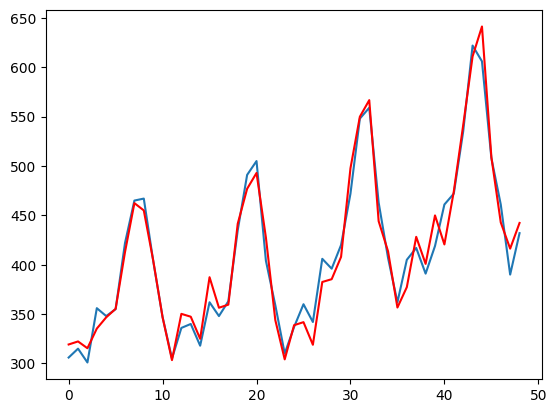

In [ ]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print(rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()